## Causal Impact Analysis on Financial Data

In [ ]:
#installing libraries

!pip install yfinance
!pip install causalimpact

In [19]:
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Set Dates to load data

In [20]:
# Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24"

#### Load financial data

In [21]:
#Bitcoin
y = ["BTC-USD"]
y = yf.download(tickers=y,
                start=training_start,
                end=end_stock,
                interval="1d")
y = y["Adj Close"].rename("y")
y[:1]

[*********************100%%**********************]  1 of 1 completed


Date
2020-09-01    11970.478516
Name: y, dtype: float64

#### Load more financial data

In [22]:
#Load More Data
Stock = ["ZAL.DE", "SQ", "CRSP", "TRMB", "JD", "KTOS", "GOOG"]
X = yf.download(tickers=Stock,
                start = training_start,
                end = end_stock,
                interval ="1d")

[*********************100%%**********************]  7 of 7 completed


#### Preview data

In [23]:
X.tail()

Adj Close                                               \
                  CRSP       GOOG         JD       KTOS          SQ   
Date                                                                  
2020-10-19  107.720001  76.730499  77.461121  20.639999  186.960007   
2020-10-20  106.699997  77.796501  79.344559  20.660000  185.740005   
2020-10-21   92.220001  79.665497  79.402222  20.580000  177.820007   
2020-10-22   90.160004  80.766502  78.133774  21.469999  175.929993   
2020-10-23   92.650002  82.050003  78.162605  21.600000  176.770004   

                                       Close                        ...  \
                 TRMB     ZAL.DE        CRSP       GOOG         JD  ...   
Date                                                                ...   
2020-10-19  51.970001  85.000000  107.720001  76.730499  80.610001  ...   
2020-10-20  51.919998  84.980003  106.699997  77.796501  82.570000  ...   
2020-10-21  50.740002  83.139999   92.220001  79.665497  82.629997  ...   
2020-10-22  50.939999  83.839996   90.160004  80.766502  81.309998  ...   
2020-10-23  50.080002  82.559998   92.650002  82.050003  81.339996  ...   

                  Open                           Volume              \
                    SQ       TRMB     ZAL.DE       CRSP        GOOG   
Date                                                                  
2020-10-19  188.110001  52.410000  85.239998   980900.0  32142000.0   
2020-10-20  188.100006  52.509998  84.940002   762900.0  44834000.0   
2020-10-21  183.550003  52.220001  84.900002  4107800.0  51366000.0   
2020-10-22  178.500000  51.009998  82.500000  1960300.0  28672000.0   
2020-10-23  177.500000  51.139999  83.500000  1141600.0  27516000.0   

                                                                
                   JD      KTOS          SQ       TRMB  ZAL.DE  
Date                                                            
2020-10-19  8051000.0  636900.0   5454000.0   734300.0  348885  
2020-10-20  9706500.0  510700.0   4876000.0   569100.0  396401  
2020-10-21  7680200.0  443100.0  10477200.0   970800.0  583473  
2020-10-22  8746300.0  836800.0   6681600.0  1473400.0  405879  
2020-10-23  6838800.0  557400.0   4167600.0  1186300.0  329582  

[5 rows x 42 columns]

#### Preparing the data

In [24]:
X = X.iloc[:,:len(Stock)]
X.head(1)

Adj Close                                                         
                 CRSP     GOOG         JD       KTOS          SQ   TRMB ZAL.DE
Date                                                                          
2020-09-01  93.419998  83.0355  79.267685  19.700001  166.660004  53.41   77.0

#### Remove Adj Close and Set Time Zone

In [25]:
#remove droplevel column
X.columns = X.columns.droplevel()
X.head(1)

#Time Zones
X.index = X.index.tz_localize(None)

#### Add y column to X column

In [26]:
X = pd.concat([y, X], axis=1).dropna()
X.tail()

,y,CRSP,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-10-19,11742.037109,107.720001,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000
2020-10-20,11916.334961,106.699997,77.796501,79.344559,20.660000,185.740005,51.919998,84.980003
2020-10-21,12823.689453,92.220001,79.665497,79.402222,20.580000,177.820007,50.740002,83.139999
2020-10-22,12965.891602,90.160004,80.766502,78.133774,21.469999,175.929993,50.939999,83.839996
2020-10-23,12931.539062,92.650002,82.050003,78.162605,21.600000,176.770004,50.080002,82.559998


#### Analysis

In [27]:
df_training = X.loc[X.index <= training_end]
df_training.tail(2)

,y,CRSP,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-10-16,11322.123047,109.830002,78.650497,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,107.720001,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000


#### Change Percentege of Data

In [28]:
differencing = X.pct_change().dropna()

differencing

,y,CRSP,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-09-02,-0.046485,0.005459,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,-0.087725,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935
2020-09-04,0.026014,-0.042829,-0.030941,0.012146,-0.013320,-0.042326,-0.018468,-0.044486
2020-09-08,-0.036178,-0.006828,-0.036863,-0.047250,-0.001558,-0.049730,-0.016413,0.023697
2020-09-09,0.010939,0.046526,0.016034,0.012726,0.016641,0.036662,0.019740,-0.009804
2020-09-10,0.011793,-0.040469,-0.016018,-0.034460,-0.004092,-0.021774,-0.018958,-0.002475
2020-09-11,0.003645,-0.022249,-0.007376,-0.004696,0.008731,-0.025661,0.020342,-0.003584
2020-09-14,0.026913,0.059140,-0.000947,0.032488,0.052953,0.050564,0.005383,0.015772
2020-09-15,0.010871,0.002597,0.014586,0.005353,0.013540,0.069945,0.032719,0.014438


#### Visual Correlations via Heatmap

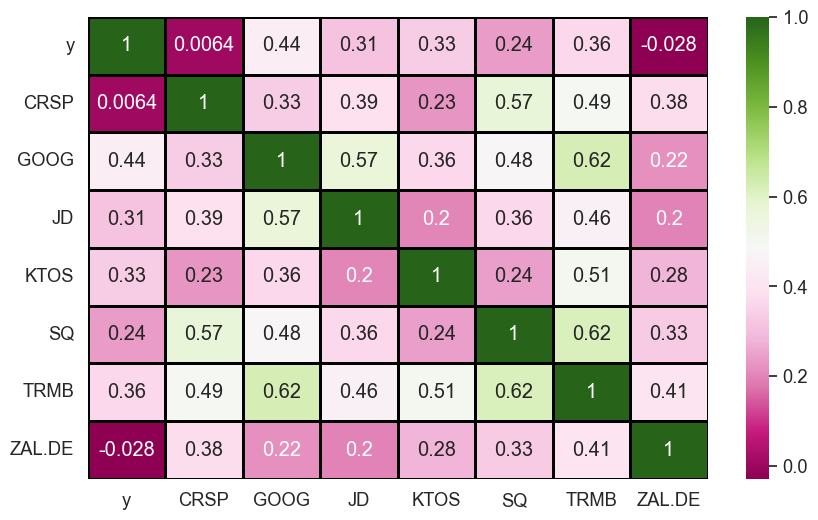

In [29]:
plt.figure(figsize=(10, 6))
sns.set(font_scale = 1.2)
sns.heatmap(data = differencing.corr(),
            annot = True,
            fmt = ".2g",
            linewidth = 1,
            cmap = "PiYG",
            linecolor = 'black');

#### Causal Impact

In [43]:
df_final = X.drop(columns = ['ZAL.DE'])
df_final.tail()
# df_final.index = pd.DatetimeIndex(df_final.index).to_period('D')
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

/Users/johnnyvargas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/johnnyvargas/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(
/Users/johnnyvargas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/johnnyvargas/a

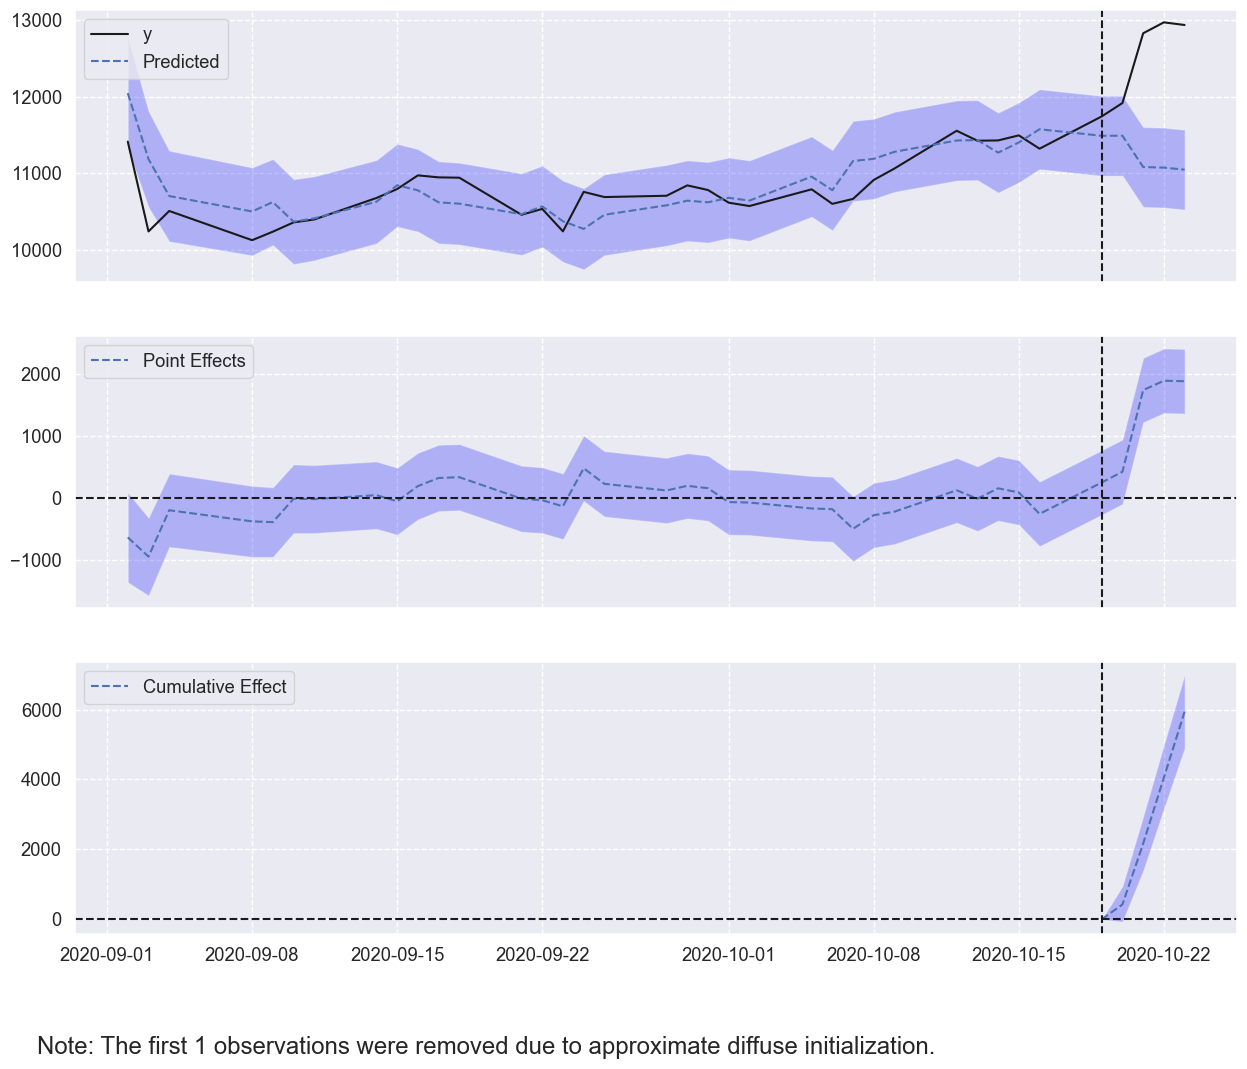

In [45]:
impact = CausalImpact(data=df_final, pre_period=pre_period, post_period=post_period)

impact.plot()

#### Summary

In [46]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11174.96.
The 95% interval of this counterfactual prediction is [10909.66, 11436.59].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1484.4 with a 95% interval of
[1222.78, 1749.71]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.46.
By contrast, had the intervention not taken place, we would have expected
a sum of 44699.84. The 95% interval of this prediction is [43638.63, 45746.35].


The above results are given in terms of absolute numbers. In relative
t